# Imports

In [ ]:
using EpistemicNetworkAnalysis

# Load and Prepare Data

In [2]:
data = ena_dataset("transitions.data")
derivedAnyCode!(data, :BODY, :Changes, :Mood, :Oily, :Dysphoria, :Cry)
derivedAnyCode!(data, :REFLECT, :Identity, :Longing, :Dream, :Childhood, :Family, :Name, :Letter, :Doubt, :Religion)
derivedAnyCode!(data, :LEARN, :WWW, :Experiment, :Recipe)
derivedAnyCode!(data, :PROGRESS, :Strangers, :Passed, :Out, :Affirmation)

337-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 1.0
 1.0
 0.0
 1.0
 0.0
 0.0
 1.0
 1.0
 0.0
 0.0
 0.0
 1.0

# Nonlinear ENA Model

In [3]:
codes = [
    :BODY,
    :REFLECT,
    :LEARN,
    :PROGRESS,
    :DoseTracking,
    :SkippedDose,
    :Happy,
    :NonHappy,
    :Sweets,
]

conversations = [:Day]
units = [:Day]
continuous = [:Day]

rotation = UMAPRotation(
    randomState=4321,
    weight=0.02702702702702703, # works out to: give equal weighting on all cols
    numNeighbors=35 # default
)

myENA = NonlinearENAModel(
    data, codes, conversations, units,
    continuous=continuous,
    sphereNormalize=true,
    dropEmpty=true,
    rotateBy=rotation
)

display(myENA)

Units (plotted points):
246×40 DataFrame
 Row │ ENA_UNIT  pos_x        pos_y      BODY_Happy  SkippedDose_Sweets  LEARN ⋯
     │ String    Float64      Float64    Real        Real                Real  ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 0         -0.399203    -1.31966     0.0                 0.0             ⋯
   2 │ 1          0.430316    -2.34739     0.57735             0.0
   3 │ 2          0.176153    -2.32101     0.0                 0.0
   4 │ 3          0.176791    -2.26332     0.0                 0.0
   5 │ 4         -0.245151    -2.5435      0.0                 0.0             ⋯
   6 │ 5          0.530369    -2.25413     0.316228            0.0
   7 │ 6          0.0775028   -2.21365     0.0                 0.0
   8 │ 7          2.47277     -1.46714     0.408248            0.0
   9 │ 8         -0.532603    -2.00558     0.0                 0.0             ⋯
  10 │ 9          2.59386     -2.72447     0.0                 0.408248

# Plotting

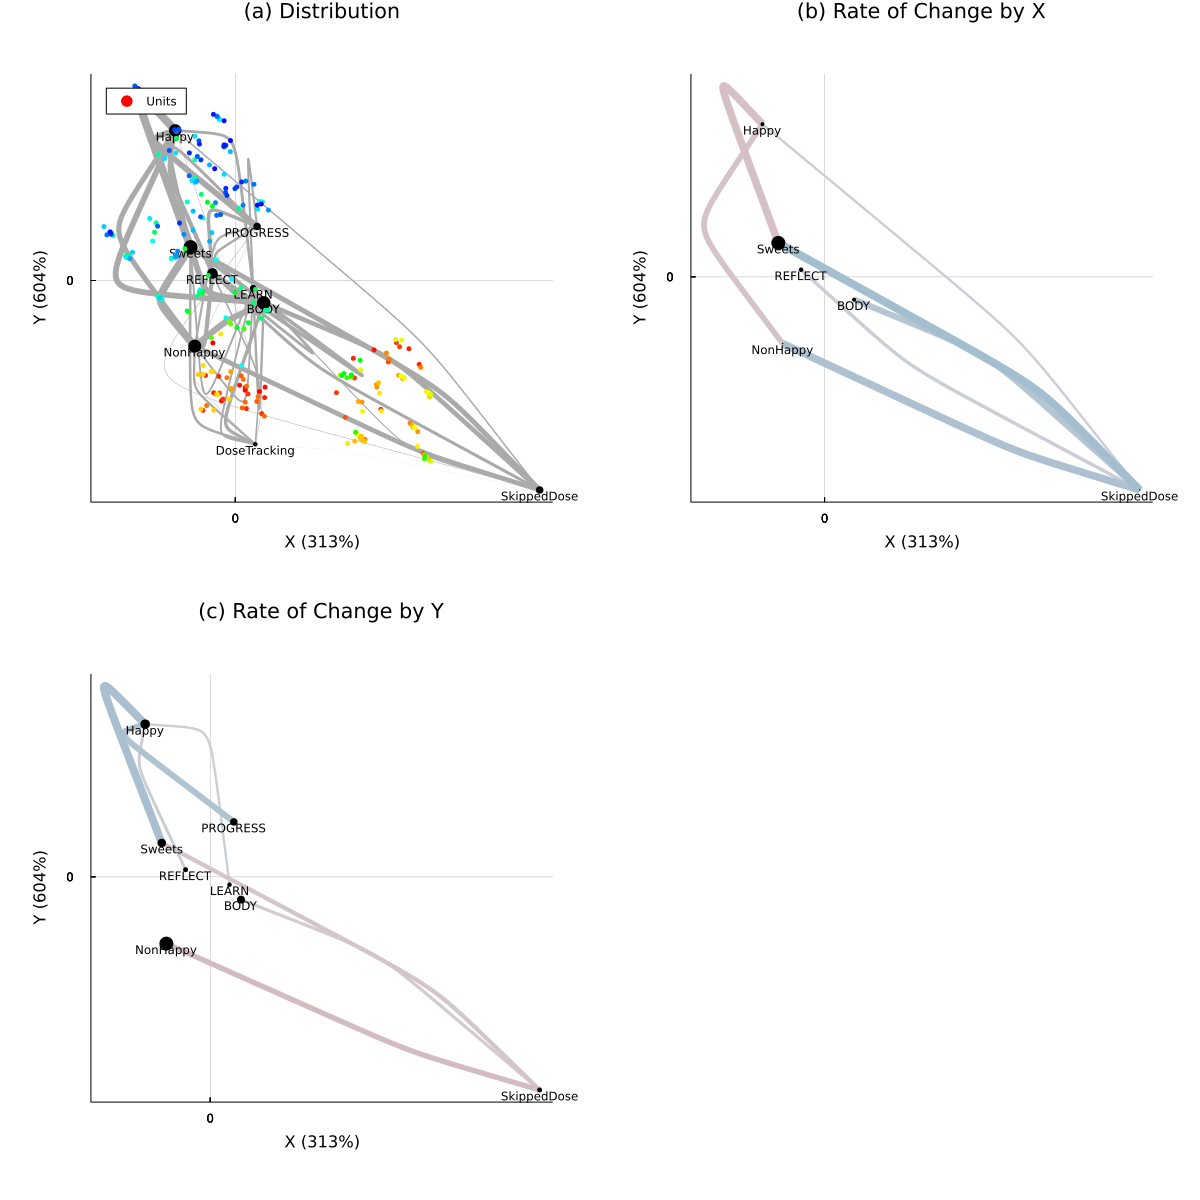

┌ Warning: Indices Base.OneTo(9) of attribute `markersize` does not match data indices 1:6.
└ @ Plots /srv/julia/pkg/packages/Plots/1RWWg/src/utils.jl:132
┌ Warning: Indices Base.OneTo(9) of attribute `markersize` does not match data indices 1:6.
└ @ Plots /srv/julia/pkg/packages/Plots/1RWWg/src/utils.jl:132
┌ Warning: Indices Base.OneTo(9) of attribute `markersize` does not match data indices 1:8.
└ @ Plots /srv/julia/pkg/packages/Plots/1RWWg/src/utils.jl:132
┌ Warning: Indices Base.OneTo(9) of attribute `markersize` does not match data indices 1:8.
└ @ Plots /srv/julia/pkg/packages/Plots/1RWWg/src/utils.jl:132


In [4]:
p = plot(myENA, showWarps=true, lims=0, weakLinks=false, spectralColorBy=:Day)
display(p)